In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# For modeling
from fastai.tabular import *
from fastai.collab import *

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt 

# For working with data
import pandas as pd
import numpy as np

In [0]:
path = Path('/content/drive/My Drive/kaggle/MovieTweeting')

In [0]:
data = pd.read_pickle(path/'movies_preprocessed.pkl')

In [5]:
data.head()

,id,name,user_id,movie_id,rating,rating_timestamp,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,8,Edison Kinetoscopic Record of a Sneeze (1894),45154,8,5,1396981211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,10,La sortie des usines Lumière (1895),54337,10,10,1412878553,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,12,The Arrival of a Train (1896),43407,12,10,1439248579,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,91,Le manoir du diable (1896),10882,91,6,1385233195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,91,Le manoir du diable (1896),36861,91,5,1532347349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
data_reduced = data[['movie_id', 'user_id', 'rating']]

rows = []
user_id = 99999
# movies: Ted, Hachi: A Dog's Tale, The Intouchables, Minions, The Great Gatsby
movie_id = [1637725, 1028532, 1675434, 2293640, 1343092]
ratings = [7, 9, 10, 8, 10]

for i in range(len(movie_id)):
  rows.append( dict( {'movie_id' : movie_id[i], 'user_id' : user_id, 'rating' : ratings[i]}))
user_data = pd.DataFrame(rows)

data_reduced = pd.concat([data_reduced, user_data], axis=0)
data_reduced.head()

,movie_id,user_id,rating
0,8,45154,5
1,10,54337,10
2,12,43407,10
4,91,10882,6
5,91,36861,5


In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, user_name='user_id', item_name='movie_id', rating_name='rating')

In [0]:
learn = collab_learner(data_collab, n_factors=40, y_range=(0, 10), wd=1e-2)

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


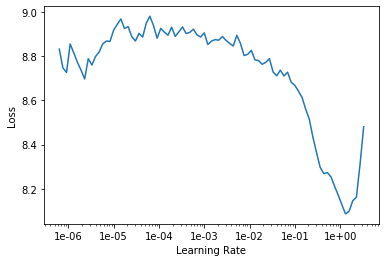

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,3.843827,3.886314,01:15
1,2.621961,2.743539,01:16
2,2.263255,2.552278,01:15
3,2.267461,2.492917,01:15
4,2.147135,2.485517,01:15


In [0]:
learn.save("trained_model", return_path=True)

PosixPath('models/trained_model.pth')

In [0]:
!mv /content/models/trained_model.pth /content/drive/My\ Drive/kaggle/MovieTweeting

In [0]:
rows = []
movies = list(data.drop_duplicates(subset='movie_id', keep='first').movie_id)
names = list(data.drop_duplicates(subset='movie_id', keep='first').name)

for i in range(len(movies)):
  rows.append( dict({'name': names[i], 'movie_id' : movies[i], 'user_id' : 99999}))
test_data = pd.DataFrame(rows)


In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, test=test_data, seed=42, valid_pct=0.2, user_name='user_id', item_name='movie_id', rating_name='rating')
learn = collab_learner(data_collab, n_factors=40, y_range=(0, 10), wd=1e-2)
learn_loaded = learn.load(Path('/content/drive/My Drive/kaggle/MovieTweeting/trained_model'))

In [11]:
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [13]:
for idx, (score, name) in enumerate(sorted(zip(preds, names), reverse=True)):
  if idx >= 10:
    break
  print("Score: ", round(float(score), 2), " for movie: ", name)

Score:  9.73  for movie:  The Shawshank Redemption (1994)
Score:  9.63  for movie:  The Lord of the Rings: The Return of the King (2003)
Score:  9.63  for movie:  The Godfather (1972)
Score:  9.57  for movie:  Joker (2019)
Score:  9.54  for movie:  The Godfather: Part II (1974)
Score:  9.53  for movie:  The Dark Knight (2008)
Score:  9.52  for movie:  12 Angry Men (1957)
Score:  9.51  for movie:  Dangal (2016)
Score:  9.51  for movie:  It's a Wonderful Life (1946)
Score:  9.44  for movie:  Schindler's List (1993)
